# In-class activity: Exploring the `rt-pol` network
In this activity, we will explore the structure of a network of political retweets from the article "Political polarization on Twitter" by Conover, Ratkiewicz, and Goncalves. The data is a three-column `.txt` edgelist, where each edge indicates that node $j$ retweeted node $i$. The third column indicates the timestamp of the retweet.

In [1]:
# First, let's import our needed packages
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Now, let's ingest the data
edgelist = pd.read_csv("../data/rt-pol.txt", header=None)
edgelist.columns=["source", "target", "timestamp"]

In [3]:
edgelist

,source,target,timestamp
0,12464,7349,1286901355
1,6820,12569,1287988962
2,4336,15967,1286535938
3,16397,5927,1285134188
4,8829,13851,1285493596
...,...,...,...
61152,13184,4383,1288048135
61153,14984,1888,1286764105
61154,946,9742,1287022819
61155,3081,12973,1287114249


In [4]:
# And turn it into a graph
G = nx.from_pandas_edgelist(edgelist)

## Tasks
Now, I'd like you to do the following:
* Determine the average degree of the network
* Plot the degree distribution
* Determine the longest path
* Figure out which node has the highest degree
* Figure out which node has the highest eigenvector centrality

**Hint:** Take a look at the tutorial for the book [here](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/tutorials/Chapter%203%20Tutorial.ipynb)

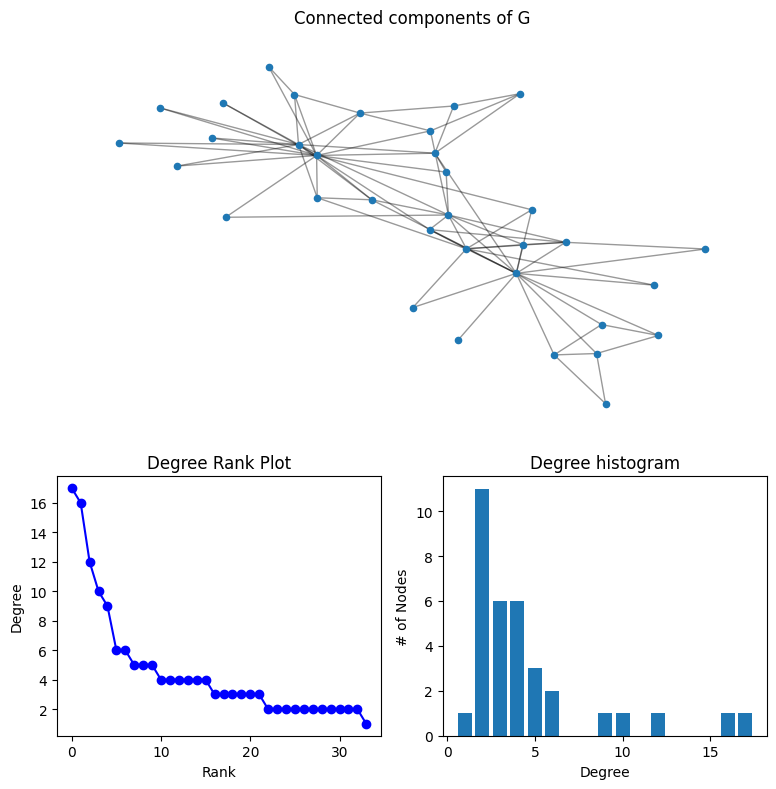

In [10]:
G = nx.karate_club_graph()

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()